Training a Machine Learning model (XGBoost)

Cài đặt thư viện cần thiết

In [1]:
!pip install -U xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 50 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from matplotlib import pyplot
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import time

Tìm hiểu data:\
Input: Đầu vào nhóm sẽ dùng dataset oto trên kaggle https://www.kaggle.com/c/otto-group-product-classification-challenge/data 
Dataset này bao gồm khoảng 94.000 sản phẩm và 93 input featuresđược chia thành 10 nhóm (ví dụ: thời trang, điện tử, ...). Mục tiêu là xây dựng một model để phân loại một sản phẩm mới vào các nhóm này. Cuộc thi này đã kết thúc vào 05/2015 và người chiến thắng cũng sử dụng XGBoost để tạo model.


Tìm hiểu về ý nghĩa ứng dụng: \
XGBoost là viết tắt của Extreme Gradient Boosting.\
Đây là thuật toán state-of-the-art nhằm giải quyết bài toán supervised learning cho độ chính xác khá cao bên cạnh mô hình Deep learning.\
Vấn đề với các mô hình thường là dữ liệu lớn quá sẽ ảnh hưởng đến thời gian chạy,tốn nhiều chi phí,...\
XGboost có tốc độ huấn luyện nhanh, có khả năng scale để tính toán song song trên nhiều server, có thể tăng tốc bằng cách sử dụng GPU, nhờ vậy mà Big Data không phải là vấn đề của mô hình này.


Ứng dụng này cần tăng tốc vì XGBoost là mô hình có thể tính toán song song và tăng tốc sử dụng GPU, nên việc phát triển ứng dụng luôn cần thiết.\
Phát biểu bài toán XGBoost kèm theo file word đính kèm (vì có nhiều công thức)

1 87.47510032599996
2 60.64199457799998
3 72.10043657299991
4 62.33662604400001
5 61.59933472399996
6 66.55131752300008


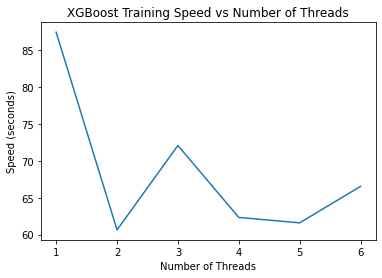

In [9]:
data = read_csv('/content/sample_data/train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4,5,6]
for n in num_threads:
    t1 = time.perf_counter()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    t2 = time.perf_counter()
    elapsed = t2 - t1
    print(n, elapsed)
    results.append(elapsed)
# plot results
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

Nhận xét Có thể thấy xu hướng có vẻ giảm của thời gian train model khi số lượng threads tăng lên